In [1]:

import acquire
import prep

# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

### Database Info

The U.S. Energy Information Administration is committed to enhancing the value of its free and open data by making it available through an Application Programming Interface (API) and open data tools to better serve our customers. The data in the API is also available in bulk file, in Excel via the add-in, in Google Sheets via an add-on, and via widgets that embed interactive data vizualizations of EIA data on any website. By making EIA data available in machine-readable formats, the creativity in the private, the non-profit, and the public sectors can be harnessed to find new ways to innovate and create value-added services powered by public data.



Currently, EIA's API contains the following main data sets:

Hourly electricity operating data, including actual and forecast demand, net generation, and the power flowing between electric systems
408,000 electricity series organized into 29,000 categories
30,000 State Energy Data System series organized into 600 categories
115,052 petroleum series and associated categories
34,790 U.S. crude imports series and associated categories
11,989 natural gas series and associated categories
132,331 coal series and associated categories
3,872 Short-Term Energy Outlook series and associated categories
368,466 Annual Energy Outlook series and associated categories
92,836 International energy series

In [2]:
# call function to view the api keys
data = acquire.epi_category('711238')
data.keys()

dict_keys(['request', 'category'])

In [3]:
# create a function that encompasses the data
def data_manipulation(data):
    """ Returns a dataframe of the series with the given id."""
    # convert to dataframe to view data i would like to view
    df_series = pd.DataFrame(data['category']['childseries'])
    df_series
    # select only the f rows that have 'A'
    df_series[df_series['f'] == 'A']
    series_id = []
    series_name = []
    for i in range(len(df_series)):
        if df_series['f'][i] == 'M':
            series_id.append(df_series['series_id'][i])
            series_name.append(df_series['name'][i])
    print(series_id)
    print(series_name)
    return series_id, series_name

In [4]:
series_id, series_name = data_manipulation(data)

['TOTAL.FFPRBUS.M', 'TOTAL.FFTCBUS.M', 'TOTAL.NUETBUS.M', 'TOTAL.REPRBUS.M', 'TOTAL.RETCBUS.M', 'TOTAL.TEAJBUS.M', 'TOTAL.TEEXBUS.M', 'TOTAL.TEIMBUS.M', 'TOTAL.TENIBUS.M', 'TOTAL.TEPRBUS.M', 'TOTAL.TETCBUS.M']
['Total Fossil Fuels Production, Monthly', 'Total Fossil Fuels Consumption, Monthly', 'Nuclear Electric Power Consumption/Production, Monthly', 'Total Renewable Energy Production, Monthly', 'Total Renewable Energy Consumption, Monthly', 'Primary Energy Stock Change and Other, Monthly', 'Total Primary Energy Exports, Monthly', 'Total Primary Energy Imports, Monthly', 'Total Primary Energy Net Imports, Monthly', 'Total Primary Energy Production, Monthly', 'Total Primary Energy Consumption, Monthly']


In [5]:
# # convert to dataframe to view data i would like to view
# df_series = pd.DataFrame(data['category']['childseries'])
# df_series
# # select only the f rows that have 'A'
# df_series[df_series['f'] == 'A']


In [6]:
# # create a list of the series_id's and names where the f is A
# series_id = []
# series_name = []
# for i in range(len(df_series)):
#     if df_series['f'][i] == 'M':
#         series_id.append(df_series['series_id'][i])
#         series_name.append(df_series['name'][i])
# print(series_id)
# print(series_name)

In [7]:
# call function to build the working dataframe
df_list = acquire.build_df_list_rename(series_id, series_name)

In [8]:
def concat_sort(df_list):
    """ Returns a dataframe of the series with the given id."""
    # concat the dataframes
    df = pd.concat(df_list, axis=1)
    # sort the dataframe by date
    df = df.sort_index()
    return df

In [9]:
# convert df_list to a dataframe and join lists on the date
# df_list = pd.concat(df_list, axis=1)

In [10]:
# df_list.sort_index(inplace=True)
# df_list

In [11]:
df = prep.prep_data(df_list)

In [12]:
df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,nuclear_electric_power_consumptionproduction_monthly,total_renewable_energy_production_monthly,total_renewable_energy_consumption_monthly,primary_energy_stock_change_and_other_monthly,total_primary_energy_exports_monthly,total_primary_energy_imports_monthly,total_primary_energy_net_imports_monthly,total_primary_energy_production_monthly,total_primary_energy_consumption_monthly
date,,,,,,,,,,,
1973-01-01,4932.632,6747.651,68.103,403.981,403.981,771.858,125.781,1173.080,1047.299,5404.715,7223.873
1973-02-01,4729.582,6163.095,64.634,360.900,360.900,390.129,120.883,1168.005,1047.122,5155.115,6592.366
1973-03-01,4946.902,6044.647,72.494,400.161,400.161,-67.640,139.950,1309.473,1169.523,5419.556,6521.439
1973-04-01,4716.271,5493.184,64.070,380.470,380.470,-110.067,194.185,1085.169,890.984,5160.812,5941.729
1973-05-01,4956.995,5613.551,62.111,392.141,392.141,-305.335,196.775,1162.804,966.029,5411.246,6071.940
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,6360.590,6065.796,673.595,970.036,960.758,-195.710,1926.767,1827.771,-98.997,8004.221,7709.515
2021-10-01,6726.426,6075.225,594.842,1010.785,1001.577,-274.187,2125.190,1748.696,-376.494,8332.054,7681.373
2021-11-01,6630.764,6450.370,655.479,1043.517,1020.650,201.897,2174.256,1773.062,-401.194,8329.761,8130.464


In [13]:
# feature engineer
def feat_eng(df):
    df['fossil_fuels_difference'] = df['total_fossil_fuels_production_monthly'] - df['total_fossil_fuels_consumption_monthly']
    df['primary_energy_import/export'] = df['total_primary_energy_imports_monthly'] - df['total_primary_energy_exports_monthly']
    df['primary_energy_difference'] = df['total_primary_energy_production_monthly'] - df['total_primary_energy_consumption_monthly']
    df['total_fossil_fuel_difference'] = df['total_fossil_fuels_consumption_monthly'] - df['total_primary_energy_consumption_monthly']
    return df

In [14]:
# # feature engineering 
# # create a new column that is the difference between the total_fossil_fuels_production_monthly and otal_fossil_fuels_consumption_monthly
# df['fossil_fuels_difference'] = df['total_fossil_fuels_production_monthly'] - df['total_fossil_fuels_consumption_monthly']


In [15]:
df = feat_eng(df)

In [16]:
df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,nuclear_electric_power_consumptionproduction_monthly,total_renewable_energy_production_monthly,total_renewable_energy_consumption_monthly,primary_energy_stock_change_and_other_monthly,total_primary_energy_exports_monthly,total_primary_energy_imports_monthly,total_primary_energy_net_imports_monthly,total_primary_energy_production_monthly,total_primary_energy_consumption_monthly,fossil_fuels_difference,primary_energy_import/export,primary_energy_difference,total_fossil_fuel_difference
date,,,,,,,,,,,,,,,
1973-01-01,4932.632,6747.651,68.103,403.981,403.981,771.858,125.781,1173.080,1047.299,5404.715,7223.873,-1815.019,1047.299,-1819.158,-476.222
1973-02-01,4729.582,6163.095,64.634,360.900,360.900,390.129,120.883,1168.005,1047.122,5155.115,6592.366,-1433.513,1047.122,-1437.251,-429.271
1973-03-01,4946.902,6044.647,72.494,400.161,400.161,-67.640,139.950,1309.473,1169.523,5419.556,6521.439,-1097.745,1169.523,-1101.883,-476.792
1973-04-01,4716.271,5493.184,64.070,380.470,380.470,-110.067,194.185,1085.169,890.984,5160.812,5941.729,-776.913,890.984,-780.917,-448.545
1973-05-01,4956.995,5613.551,62.111,392.141,392.141,-305.335,196.775,1162.804,966.029,5411.246,6071.940,-656.556,966.029,-660.694,-458.389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,6360.590,6065.796,673.595,970.036,960.758,-195.710,1926.767,1827.771,-98.997,8004.221,7709.515,294.794,-98.996,294.706,-1643.719
2021-10-01,6726.426,6075.225,594.842,1010.785,1001.577,-274.187,2125.190,1748.696,-376.494,8332.054,7681.373,651.201,-376.494,650.681,-1606.148
2021-11-01,6630.764,6450.370,655.479,1043.517,1020.650,201.897,2174.256,1773.062,-401.194,8329.761,8130.464,180.394,-401.194,199.297,-1680.094


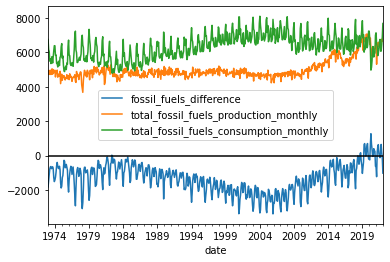

In [17]:
# plot fossil fuels difference
import matplotlib.pyplot as plt
df['fossil_fuels_difference'].plot()
df['total_fossil_fuels_production_monthly'].plot()
df['total_fossil_fuels_consumption_monthly'].plot()
# place a line at 0 
plt.axhline(y=0, color='black')
plt.legend()

In [18]:
# # create a new column that is the difference between the total_primary_energy_imports_monthly and total_primary_energy_net_imports_monthly
# df['primary_energy_difference'] = df['total_primary_energy_imports_monthly'] - df['total_primary_energy_exports_monthly']


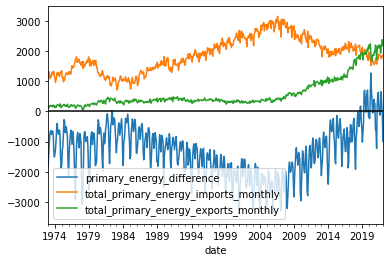

In [19]:
# plot primary energy difference
df['primary_energy_difference'].plot()
df['total_primary_energy_imports_monthly'].plot()
df['total_primary_energy_exports_monthly'].plot()
# place a line at 0
plt.axhline(y=0, color='black')
# legend
plt.legend()

In [20]:
# # create a new column with the differance between total_primary_energy_production_monthly and total_primary_energy_consumption_monthly	
# df['primary_energy_difference'] = df['total_primary_energy_production_monthly'] - df['total_primary_energy_consumption_monthly']


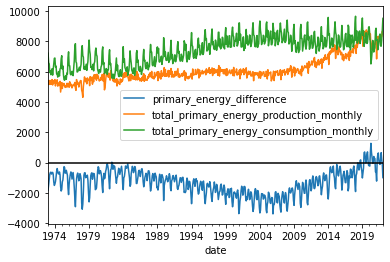

In [21]:
# plot primary energy difference
df['primary_energy_difference'].plot()
df['total_primary_energy_production_monthly'].plot()
df['total_primary_energy_consumption_monthly'].plot()
# place a line at 0
plt.axhline(y=0, color='black')
# legend
plt.legend()

In [22]:
# # create a new column with the differance between total_fossil_fuels_consumption_monthly and total_primary_energy_consumption_monthly
# df['total_fossil_fuel_difference'] = df['total_fossil_fuels_consumption_monthly'] - df['total_primary_energy_consumption_monthly']
# df

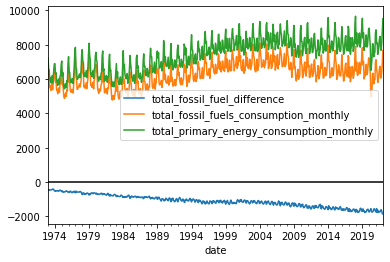

In [23]:
# plot total energy difference
df['total_fossil_fuel_difference'].plot()
df['total_fossil_fuels_consumption_monthly'].plot()
df['total_primary_energy_consumption_monthly'].plot()
# place a line at 0
plt.axhline(y=0, color='black')
# legend
plt.legend()

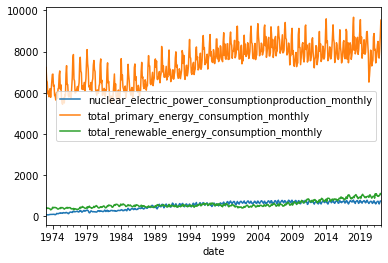

In [24]:
df['nuclear_electric_power_consumptionproduction_monthly'].plot()
df['total_primary_energy_consumption_monthly'].plot()
df['total_renewable_energy_consumption_monthly'].plot()
plt.legend()

Modeling

In [25]:
def fossil_fuels(df):
    df_fossil_fuels = df[['total_fossil_fuels_production_monthly', 'total_fossil_fuels_consumption_monthly', 'fossil_fuels_difference']]
    return df_fossil_fuels

In [26]:
# create a new dataframe with the fossil fuels
df_fossil_fuels = df[['total_fossil_fuels_production_monthly', 'total_fossil_fuels_consumption_monthly', 'fossil_fuels_difference']]
df_fossil_fuels

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
1973-01-01,4932.632,6747.651,-1815.019
1973-02-01,4729.582,6163.095,-1433.513
1973-03-01,4946.902,6044.647,-1097.745
1973-04-01,4716.271,5493.184,-776.913
1973-05-01,4956.995,5613.551,-656.556
...,...,...,...
2021-09-01,6360.590,6065.796,294.794
2021-10-01,6726.426,6075.225,651.201
2021-11-01,6630.764,6450.370,180.394


In [27]:
# from df_fossil_fuels select index with a year of 2005 and greater
df = df_fossil_fuels.loc[df_fossil_fuels.index >= '2005']

df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2005-01-01,4703.669,8015.701,-3312.032
2005-02-01,4395.181,7152.356,-2757.175
2005-03-01,4964.711,7551.950,-2587.239
2005-04-01,4661.086,6615.682,-1954.596
2005-05-01,4681.531,6708.309,-2026.778
...,...,...,...
2021-09-01,6360.590,6065.796,294.794
2021-10-01,6726.426,6075.225,651.201
2021-11-01,6630.764,6450.370,180.394


In [28]:
# df_fossil_fuels

In [29]:
# int(len(df_fossil_fuels) * 0.5)

In [30]:
# set train size to be 50% of total 
# train_size = int(len(df_fossil_fuels) * 0.5)
# train_size

In [31]:
# # set validate size to be 30% of total 
# validate_size = int(len(df_fossil_fuels) * 0.3)
# validate_size

In [32]:
# # set test size to be number of rows remaining. 
# test_size = int(len(df_fossil_fuels) - train_size - validate_size)
# test_size

In [33]:
# len(df_fossil_fuels) == train_size + validate_size + test_size

In [34]:
# validate_end_index = train_size + validate_size
# validate_end_index

In [35]:
# # train will go from 0 to 911
# train = df_fossil_fuels[:train_size]

In [36]:
# # validate will go from 912 to 1458
# validate = df_fossil_fuels[train_size:validate_end_index]

In [37]:
# validate

In [38]:
# # test will include 1459 to the end
# test = df_fossil_fuels[validate_end_index:]

In [39]:
# train.size, validate.size, test.size

In [40]:
# train

In [41]:
# # is len of train + validate + test == lenght of entire dataframe. 
# len(train) + len(validate) + len(test) == len(df_fossil_fuels)

In [42]:
df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2005-01-01,4703.669,8015.701,-3312.032
2005-02-01,4395.181,7152.356,-2757.175
2005-03-01,4964.711,7551.950,-2587.239
2005-04-01,4661.086,6615.682,-1954.596
2005-05-01,4681.531,6708.309,-2026.778
...,...,...,...
2021-09-01,6360.590,6065.796,294.794
2021-10-01,6726.426,6075.225,651.201
2021-11-01,6630.764,6450.370,180.394


In [43]:
def split_data_model(df):
    df = df.loc[df.index >= '2005']
    train_size = int(len(df) * 0.5)
    validate_size = int(len(df) * 0.3)
    validate_end_index = train_size + validate_size
    train = df[:train_size]
    validate = df[train_size:validate_end_index]
    test = df[validate_end_index:]
    return train, validate, test

train, validate, test = split_data_model(df)


In [44]:
train

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2005-01-01,4703.669,8015.701,-3312.032
2005-02-01,4395.181,7152.356,-2757.175
2005-03-01,4964.711,7551.950,-2587.239
2005-04-01,4661.086,6615.682,-1954.596
2005-05-01,4681.531,6708.309,-2026.778
...,...,...,...
2013-02-01,4873.599,6636.237,-1762.638
2013-03-01,5374.647,6918.264,-1543.617
2013-04-01,5194.428,6076.252,-881.824


In [45]:
validate

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2013-07-01,5501.372,6679.546,-1178.174
2013-08-01,5622.438,6638.514,-1016.076
2013-09-01,5406.165,6209.405,-803.240
2013-10-01,5473.866,6275.289,-801.423
2013-11-01,5396.652,6656.275,-1259.623
...,...,...,...
2018-03-01,6261.859,6989.596,-727.737
2018-04-01,5959.594,6251.254,-291.660
2018-05-01,6206.725,6218.827,-12.102


In [46]:
# print(df_fossil_fuels.head(1) == train.head(1))

In [47]:
pd.concat([train.tail(1), validate.head(1)])

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2013-06-01,5216.612,6163.129,-946.517
2013-07-01,5501.372,6679.546,-1178.174


In [48]:
pd.concat([validate.tail(1), test.head(1)])

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2018-07-01,6405.192,6902.923,-497.731
2018-08-01,6690.612,6975.655,-285.043


In [49]:
train.columns

Index(['total_fossil_fuels_production_monthly',
       'total_fossil_fuels_consumption_monthly', 'fossil_fuels_difference'],
      dtype='object')

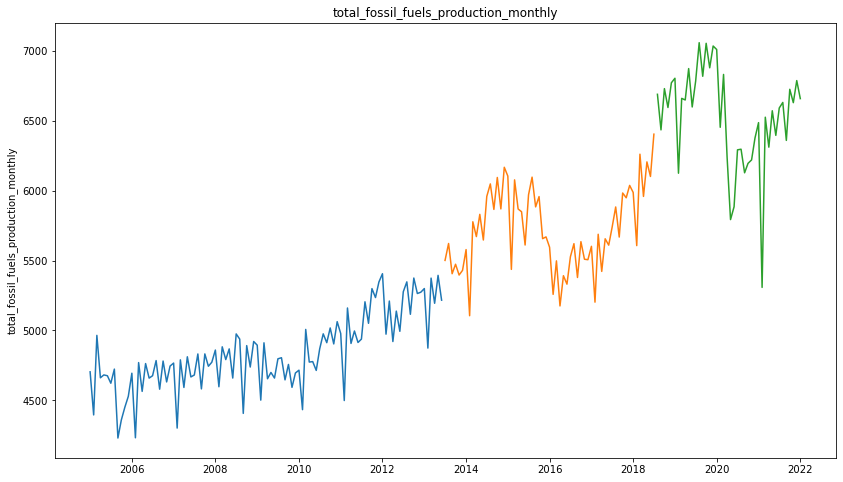

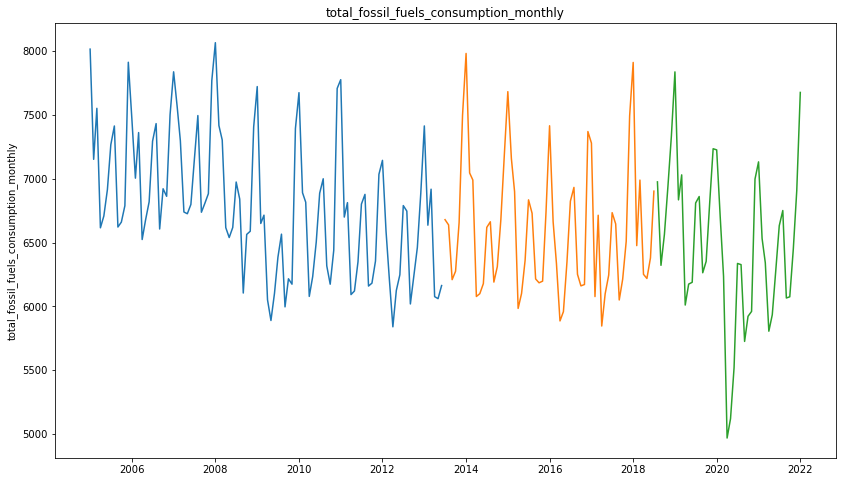

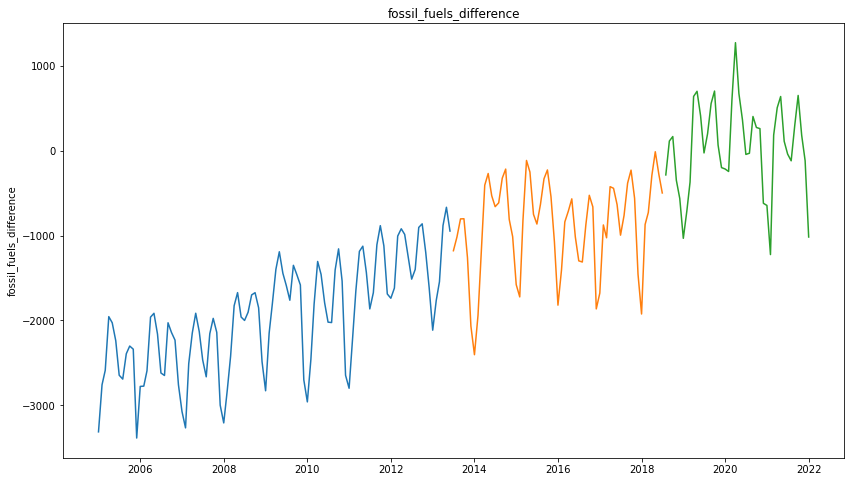

In [50]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [51]:


def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [52]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [53]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [54]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [55]:
train['total_fossil_fuels_consumption_monthly'][-1:][0]

6163.129

In [56]:
# take the last item of dollars sold and assign to variable
consumption = train['total_fossil_fuels_consumption_monthly'][-1:][0]
consumption

6163.129

In [57]:
production = train['total_fossil_fuels_production_monthly'][-1:][0]
production

5216.612

In [58]:
difference = train['fossil_fuels_difference'][-1:][0]

In [59]:
yhat_df = pd.DataFrame(
    {'total_fossil_fuels_consumption_monthly': [consumption],
     'total_fossil_fuels_production_monthly': [production],
     'fossil_fuels_difference': [difference]},
    index=validate.index)

yhat_df.head()

,total_fossil_fuels_consumption_monthly,total_fossil_fuels_production_monthly,fossil_fuels_difference
date,,,
2013-07-01,6163.129,5216.612,-946.517
2013-08-01,6163.129,5216.612,-946.517
2013-09-01,6163.129,5216.612,-946.517
2013-10-01,6163.129,5216.612,-946.517
2013-11-01,6163.129,5216.612,-946.517


In [60]:
yhat_df.describe()

,total_fossil_fuels_consumption_monthly,total_fossil_fuels_production_monthly,fossil_fuels_difference
count,61.000,61.000,61.000
mean,6163.129,5216.612,-946.517
std,0.000,0.000,0.000
min,6163.129,5216.612,-946.517
25%,6163.129,5216.612,-946.517
50%,6163.129,5216.612,-946.517
75%,6163.129,5216.612,-946.517
max,6163.129,5216.612,-946.517


You can see, when peeking into yhat_df, that every predicted value is the same.  

**Plot Actual vs. Predicted Values**

Now, let's plot actual and predicted values

total_fossil_fuels_consumption_monthly -- RMSE: 668


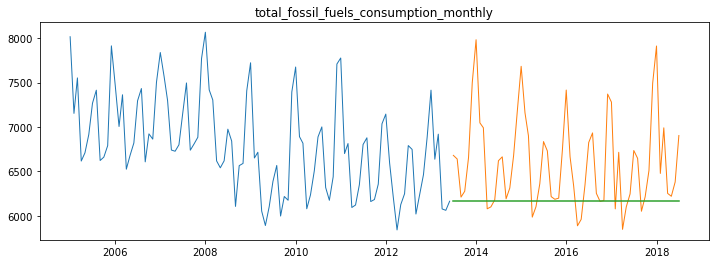

In [61]:
plot_and_eval('total_fossil_fuels_consumption_monthly')

total_fossil_fuels_production_monthly -- RMSE: 582


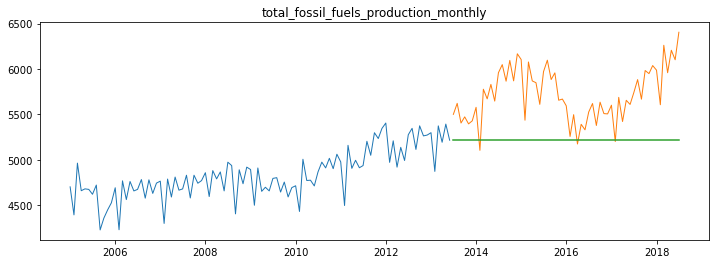

total_fossil_fuels_consumption_monthly -- RMSE: 668


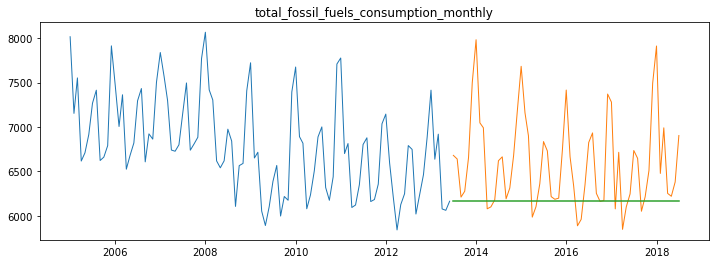

fossil_fuels_difference -- RMSE: 544


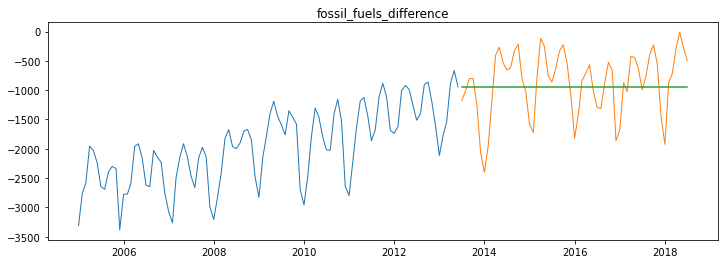

In [62]:
for col in train.columns:
    plot_and_eval(col)

In [63]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

eval_df

,model_type,target_var,rmse
0,last_observed_value,total_fossil_fuels_production_monthly,582.0
1,last_observed_value,total_fossil_fuels_consumption_monthly,668.0
2,last_observed_value,fossil_fuels_difference,544.0


### Simple Average

Take the simple average of historical values and use that value to predict future values.   

This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assigned the same value, and that value will be the overall mean of the values in train. 

**Make Predictions**

Dollars: establishing the value of the prediction we will make

In [64]:
# # compute simple average
# production = round(train['total_fossil_fuels_production_monthly'].mean(), 2)
# production

In [65]:
# consumption = round(train['total_fossil_fuels_consumption_monthly'].mean(), 2)
# consumption

In [66]:
# difference = round(train['fossil_fuels_difference'].mean(), 2)
# difference

In [67]:
def compute_simple_average(train):
    production = round(train['total_fossil_fuels_production_monthly'].mean(), 2)
    consumption = round(train['total_fossil_fuels_consumption_monthly'].mean(), 2)
    difference = round(train['fossil_fuels_difference'].mean(), 2)
    return production, consumption, difference

In [68]:
def make_predictions(production=None, consumption=None, difference=None):
    yhat_df = pd.DataFrame({'total_fossil_fuels_production_monthly': [production],
                           'total_fossil_fuels_consumption_monthly': [consumption],
                           'fossil_fuels_difference': [difference]},
                           index=validate.index)
    return yhat_df

total_fossil_fuels_production_monthly -- RMSE: 582


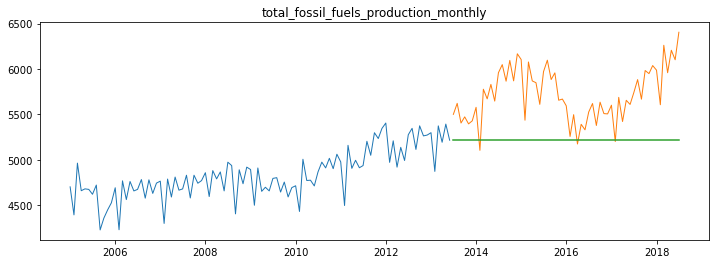

total_fossil_fuels_consumption_monthly -- RMSE: 668


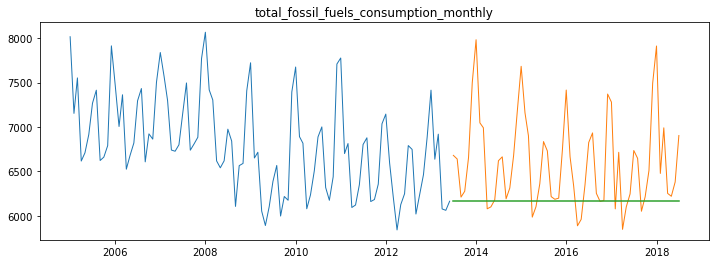

fossil_fuels_difference -- RMSE: 544


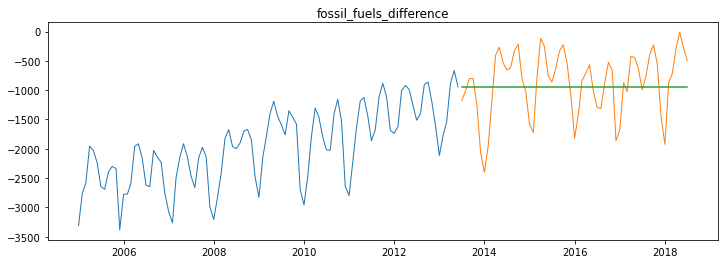

In [69]:
def simple_average(train):
    # production, consumption, difference = compute_simple_average(train)
    # yhat_df = make_predictions(production, consumption, difference)

    for col in train.columns:
        plot_and_eval(col)
    return 

simple_average(train)

In [70]:
# yhat_df = make_predictions(production, consumption, difference)

In [71]:
yhat_df.head()

,total_fossil_fuels_consumption_monthly,total_fossil_fuels_production_monthly,fossil_fuels_difference
date,,,
2013-07-01,6163.129,5216.612,-946.517
2013-08-01,6163.129,5216.612,-946.517
2013-09-01,6163.129,5216.612,-946.517
2013-10-01,6163.129,5216.612,-946.517
2013-11-01,6163.129,5216.612,-946.517


In [72]:
yhat_df.describe()

,total_fossil_fuels_consumption_monthly,total_fossil_fuels_production_monthly,fossil_fuels_difference
count,61.000,61.000,61.000
mean,6163.129,5216.612,-946.517
std,0.000,0.000,0.000
min,6163.129,5216.612,-946.517
25%,6163.129,5216.612,-946.517
50%,6163.129,5216.612,-946.517
75%,6163.129,5216.612,-946.517
max,6163.129,5216.612,-946.517


**Plot Actual vs. Predicted Values**

Now, let's plot and evaluate the performance of our time series model using **Simple Average**

total_fossil_fuels_production_monthly -- RMSE: 582


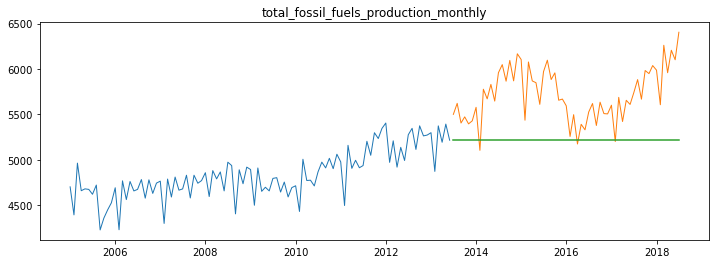

total_fossil_fuels_consumption_monthly -- RMSE: 668


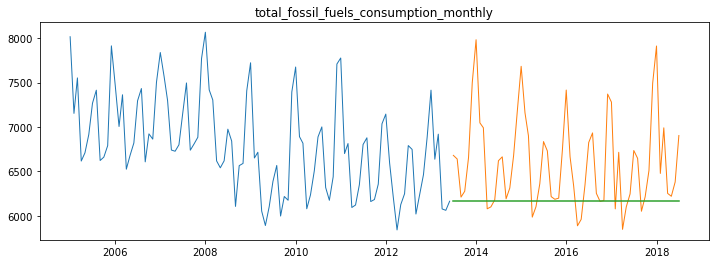

fossil_fuels_difference -- RMSE: 544


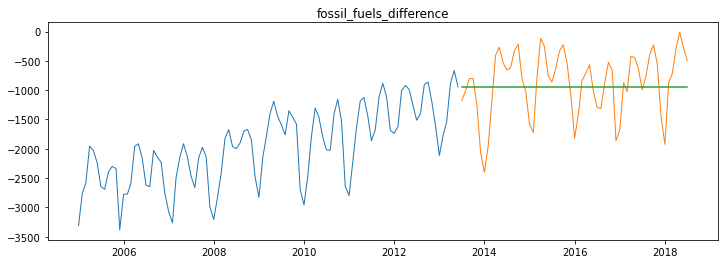

In [73]:
for col in train.columns:
    plot_and_eval(col)

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [74]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                            target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,total_fossil_fuels_production_monthly,582.0
1,last_observed_value,total_fossil_fuels_consumption_monthly,668.0
2,last_observed_value,fossil_fuels_difference,544.0
3,simple_average,total_fossil_fuels_production_monthly,582.0
4,simple_average,total_fossil_fuels_consumption_monthly,668.0
5,simple_average,fossil_fuels_difference,544.0


In [75]:
train   

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2005-01-01,4703.669,8015.701,-3312.032
2005-02-01,4395.181,7152.356,-2757.175
2005-03-01,4964.711,7551.950,-2587.239
2005-04-01,4661.086,6615.682,-1954.596
2005-05-01,4681.531,6708.309,-2026.778
...,...,...,...
2013-02-01,4873.599,6636.237,-1762.638
2013-03-01,5374.647,6918.264,-1543.617
2013-04-01,5194.428,6076.252,-881.824


### Moving Average

In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value. 

In [76]:
# demonstrate that the mean of the first 30 days 
# is equal to rolling(30) on day 30

print(train['total_fossil_fuels_production_monthly'].rolling(4).mean())

date
2005-01-01           NaN
2005-02-01           NaN
2005-03-01           NaN
2005-04-01    4681.16175
2005-05-01    4675.62725
                 ...    
2013-02-01    5177.87925
2013-03-01    5205.41400
2013-04-01    5185.61750
2013-05-01    5209.26050
2013-06-01    5295.01375
Name: total_fossil_fuels_production_monthly, Length: 102, dtype: float64


In [77]:
# make a prediction
period=4
train['total_fossil_fuels_production_monthly'].rolling(period).mean()[-1]

5295.01375

In [78]:
period = 4

# take 4 month (quarterly) rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
production = round(train['total_fossil_fuels_production_monthly'].rolling(period).mean()[-1], 2)
consumption = round(train['total_fossil_fuels_consumption_monthly'].rolling(period).mean()[-1], 2)
difference = round(train['fossil_fuels_difference'].rolling(period).mean()[-1], 2)
print(production, consumption, difference)

5295.01 6304.56 -1009.54


In [79]:
yhat_df = make_predictions(production, consumption, difference)
yhat_df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2013-07-01,5295.01,6304.56,-1009.54
2013-08-01,5295.01,6304.56,-1009.54
2013-09-01,5295.01,6304.56,-1009.54
2013-10-01,5295.01,6304.56,-1009.54
2013-11-01,5295.01,6304.56,-1009.54


**Plot Actual vs. Predicted Values**

Now, let's plot and evaluate the performance of our time series model using **Moving Average**

total_fossil_fuels_production_monthly -- RMSE: 516


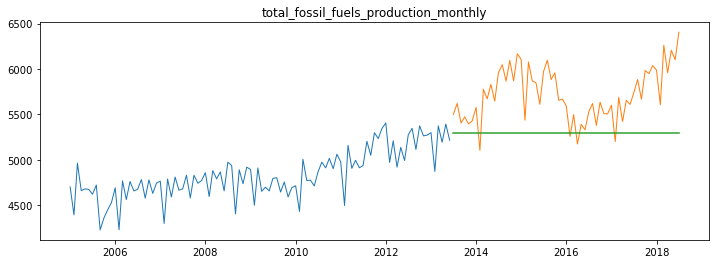

total_fossil_fuels_consumption_monthly -- RMSE: 586


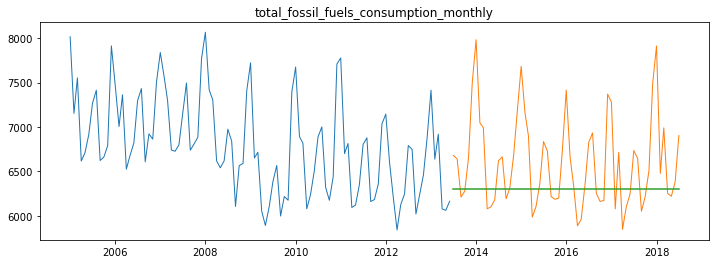

fossil_fuels_difference -- RMSE: 556


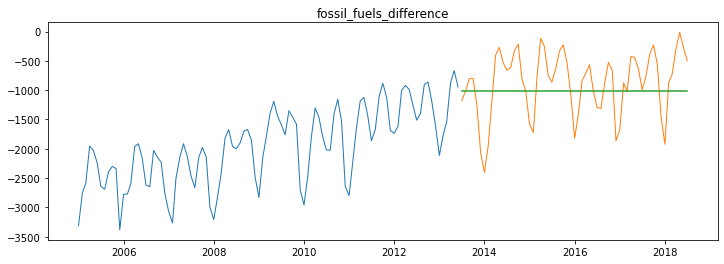

In [80]:
for col in train.columns:
    plot_and_eval(col)

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [81]:
for col in train.columns:
    eval_df = append_eval_df(model_type = '4_month_moving_average', 
                            target_var = col)

eval_df

,model_type,target_var,rmse
0,last_observed_value,total_fossil_fuels_production_monthly,582.0
1,last_observed_value,total_fossil_fuels_consumption_monthly,668.0
2,last_observed_value,fossil_fuels_difference,544.0
3,simple_average,total_fossil_fuels_production_monthly,582.0
4,simple_average,total_fossil_fuels_consumption_monthly,668.0
5,simple_average,fossil_fuels_difference,544.0
6,4_month_moving_average,total_fossil_fuels_production_monthly,516.0
7,4_month_moving_average,total_fossil_fuels_consumption_monthly,586.0
8,4_month_moving_average,fossil_fuels_difference,556.0


Let's try out several other values for periods:

In [82]:
periods = [4, 12, 24, 60]

for p in periods: 
    production = round(train['total_fossil_fuels_production_monthly'].rolling(p).mean()[-1], 2)
    consumption = round(train['total_fossil_fuels_consumption_monthly'].rolling(p).mean()[-1], 2)
    difference = round(train['fossil_fuels_difference'].rolling(p).mean()[-1], 2)
    yhat_df = make_predictions(production, consumption, difference)
    model_type = str(p) + '_mmonth_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)

In [83]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,total_fossil_fuels_production_monthly,582.0
1,last_observed_value,total_fossil_fuels_consumption_monthly,668.0
2,last_observed_value,fossil_fuels_difference,544.0
3,simple_average,total_fossil_fuels_production_monthly,582.0
4,simple_average,total_fossil_fuels_consumption_monthly,668.0
5,simple_average,fossil_fuels_difference,544.0
6,4_month_moving_average,total_fossil_fuels_production_monthly,516.0
7,4_month_moving_average,total_fossil_fuels_consumption_monthly,586.0
8,4_month_moving_average,fossil_fuels_difference,556.0
9,4_mmonth_moving_avg,total_fossil_fuels_production_monthly,516.0


Which is best so far? 

In [84]:
min_items_rmse = eval_df[eval_df.target_var == 'total_fossil_fuels_production_monthly']['rmse'].min()

In [85]:
min_items_rmse

516.0

In [86]:
eval_df[eval_df.rmse == min_items_rmse]

,model_type,target_var,rmse
6,4_month_moving_average,total_fossil_fuels_production_monthly,516.0
9,4_mmonth_moving_avg,total_fossil_fuels_production_monthly,516.0


In [87]:
min_dollars_rmse = eval_df[eval_df.target_var == 'total_fossil_fuels_consumption_monthly']['rmse'].min()

eval_df[eval_df.rmse == min_dollars_rmse]

,model_type,target_var,rmse
19,60_mmonth_moving_avg,total_fossil_fuels_consumption_monthly,508.0


In [88]:
min_dollars_rmse = eval_df[eval_df.target_var == 'fossil_fuels_difference']['rmse'].min()

eval_df[eval_df.rmse == min_dollars_rmse]

,model_type,target_var,rmse
2,last_observed_value,fossil_fuels_difference,544.0
5,simple_average,fossil_fuels_difference,544.0


### Holt's Linear Trend


Exponential smoothing applied to both the average and the trend (slope).  

- $\alpha$ / smoothing_level: smoothing parameter for mean. Values closer to 1 will have less of a smoothing effect and will give greater weight to recent values.   
- $\beta$ / smoothing_slope: smoothing parameter for the slope. Values closer to 1 will give greater weight to recent slope/values. 



**Seasonal Decomposition**


First, let's take a look at the seasonal decomposition for each target. 

In [89]:
import statsmodels.api as sm

fossil_fuels_difference 



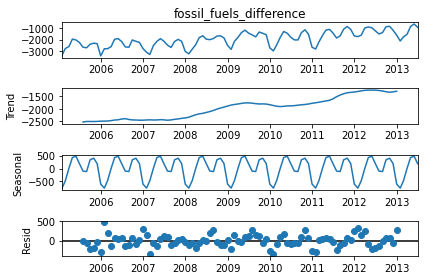

In [90]:
print(col, '\n')
sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()
plt.show()

total_fossil_fuels_production_monthly 

total_fossil_fuels_consumption_monthly 

fossil_fuels_difference 



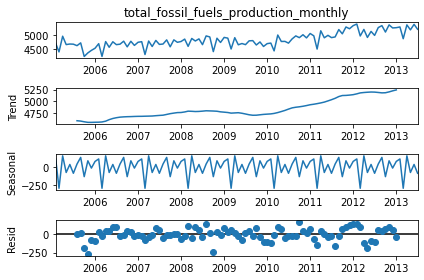

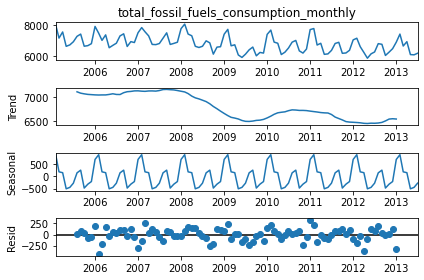

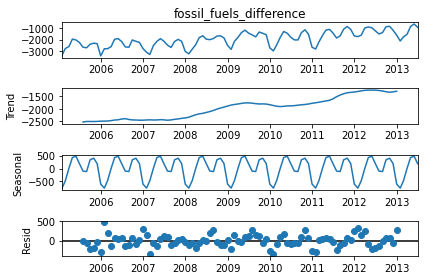

In [91]:
for col in train.columns:
    print(col,'\n')
    sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()

In [92]:
train.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2005-01-01,4703.669,8015.701,-3312.032
2005-02-01,4395.181,7152.356,-2757.175
2005-03-01,4964.711,7551.950,-2587.239
2005-04-01,4661.086,6615.682,-1954.596
2005-05-01,4681.531,6708.309,-2026.778


#### Basic Holt's Linear Trend

**Make Predictions**

Now, like we would when using sklearn, we will create the Holt object, fit the model, and make predictions. 

Holt: 

- exponential = True/False (exponential vs. linear growth, additive vs. multiplicative)
- damped $\phi$ = True/False: with Holt, forecasts will increase or decrease indefinitely into the future.  To avoid this, use the Damped trend method which has a damping parameter 0< ϕ <1. 


fit: 

- smoothing_level ($\alpha$): value between (0,1)
- smoothing_slope ($\beta$): value between (0,1)
- optimized: use the auto-optimization that allow statsmodels to automatically find an optimized value for us. 

In [93]:
train.columns

Index(['total_fossil_fuels_production_monthly',
       'total_fossil_fuels_consumption_monthly', 'fossil_fuels_difference'],
      dtype='object')

In [94]:
col = 'total_fossil_fuels_production_monthly' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [95]:
# fit the holt's object
model = model.fit(optimized=True)

In [96]:
yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])

In [97]:
validate.shape

(61, 3)

In [98]:
yhat_items

2013-07-01    5271.453835
2013-08-01    5279.008538
2013-09-01    5286.489673
2013-10-01    5293.897956
2013-11-01    5301.234096
                 ...     
2018-03-01    5598.757689
2018-04-01    5603.125066
2018-05-01    5607.449913
2018-06-01    5611.732644
2018-07-01    5615.973669
Freq: MS, Length: 61, dtype: float64

In [99]:
# doing this in a loop for each column
for col in train.columns:
    model = Holt(train[col], exponential=False, damped=True)
    model = model.fit(optimized=True)
    yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [100]:
yhat_df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2013-07-01,5271.45,6103.95,-938.10
2013-08-01,5279.01,6046.25,-932.35
2013-09-01,5286.49,5989.11,-927.50
2013-10-01,5293.90,5932.51,-923.40
2013-11-01,5301.23,5876.47,-919.94
...,...,...,...
2018-03-01,5598.76,3598.20,-901.14
2018-04-01,5603.13,3564.66,-901.14
2018-05-01,5607.45,3531.45,-901.14


In [101]:
col = 'total_fossil_fuels_production_monthly'
# create the Holt object 
model = Holt(train[col], exponential=False, damped=True)
# fit the model 
model = model.fit(optimized=True)
# make predictions for each date in validate 
yhat_items = model.predict(start = validate.index[0],
                           end = validate.index[-1])
# add predictions to yhat_df
yhat_df[col] = round(yhat_items, 2)


/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [102]:
yhat_df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2013-07-01,5271.45,6103.95,-938.10
2013-08-01,5279.01,6046.25,-932.35
2013-09-01,5286.49,5989.11,-927.50
2013-10-01,5293.90,5932.51,-923.40
2013-11-01,5301.23,5876.47,-919.94


In [103]:
validate

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2013-07-01,5501.372,6679.546,-1178.174
2013-08-01,5622.438,6638.514,-1016.076
2013-09-01,5406.165,6209.405,-803.240
2013-10-01,5473.866,6275.289,-801.423
2013-11-01,5396.652,6656.275,-1259.623
...,...,...,...
2018-03-01,6261.859,6989.596,-727.737
2018-04-01,5959.594,6251.254,-291.660
2018-05-01,6206.725,6218.827,-12.102


In [104]:
yhat_items

2013-07-01    5271.453835
2013-08-01    5279.008538
2013-09-01    5286.489673
2013-10-01    5293.897956
2013-11-01    5301.234096
                 ...     
2018-03-01    5598.757689
2018-04-01    5603.125066
2018-05-01    5607.449913
2018-06-01    5611.732644
2018-07-01    5615.973669
Freq: MS, Length: 61, dtype: float64

**Plot Actual vs. Predicted Values**

total_fossil_fuels_production_monthly -- RMSE: 385


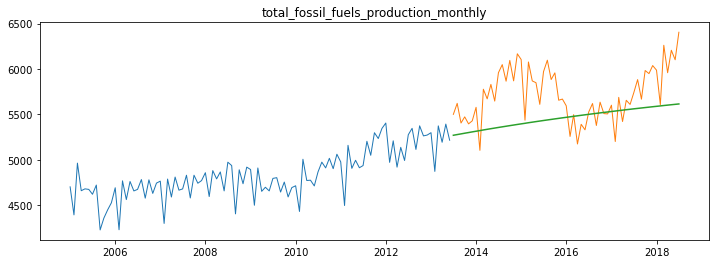

total_fossil_fuels_consumption_monthly -- RMSE: 2130


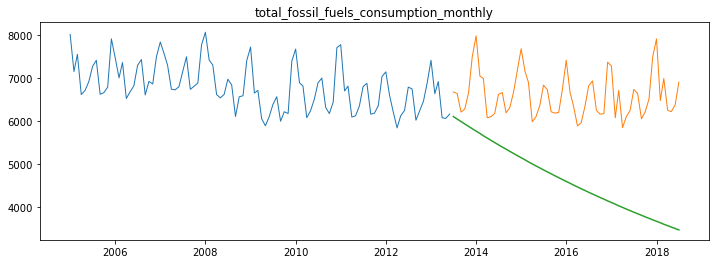

fossil_fuels_difference -- RMSE: 539


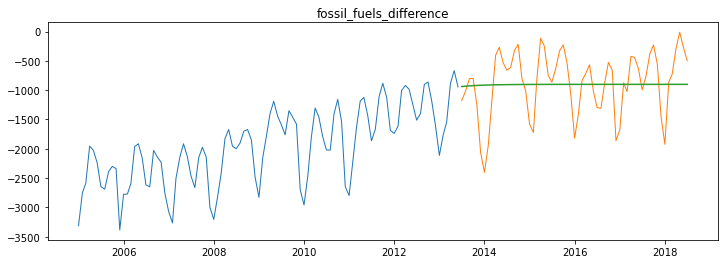

In [105]:
for col in train.columns:
    plot_and_eval(target_var = col)

Evaluate

In [106]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = col)

In [107]:
eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
21,holts_optimized,total_fossil_fuels_production_monthly,385.0
19,60_mmonth_moving_avg,total_fossil_fuels_consumption_monthly,508.0
13,12_mmonth_moving_avg,total_fossil_fuels_consumption_monthly,511.0
6,4_month_moving_average,total_fossil_fuels_production_monthly,516.0
9,4_mmonth_moving_avg,total_fossil_fuels_production_monthly,516.0
16,24_mmonth_moving_avg,total_fossil_fuels_consumption_monthly,517.0
23,holts_optimized,fossil_fuels_difference,539.0
2,last_observed_value,fossil_fuels_difference,544.0
5,simple_average,fossil_fuels_difference,544.0
12,12_mmonth_moving_avg,total_fossil_fuels_production_monthly,553.0


In [108]:
yhat_df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2013-07-01,5271.45,6103.95,-938.10
2013-08-01,5279.01,6046.25,-932.35
2013-09-01,5286.49,5989.11,-927.50
2013-10-01,5293.90,5932.51,-923.40
2013-11-01,5301.23,5876.47,-919.94


In [109]:
train.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2005-01-01,4703.669,8015.701,-3312.032
2005-02-01,4395.181,7152.356,-2757.175
2005-03-01,4964.711,7551.950,-2587.239
2005-04-01,4661.086,6615.682,-1954.596
2005-05-01,4681.531,6708.309,-2026.778


total_fossil_fuels_production_monthly -- RMSE: 364


/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


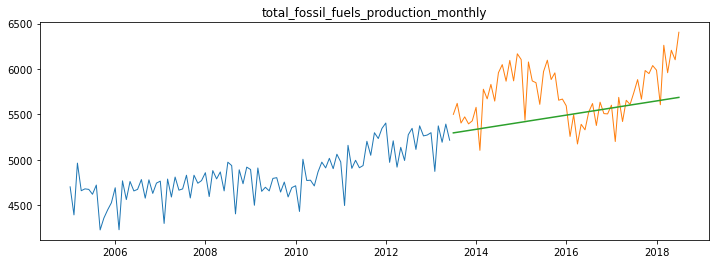

total_fossil_fuels_consumption_monthly -- RMSE: 645


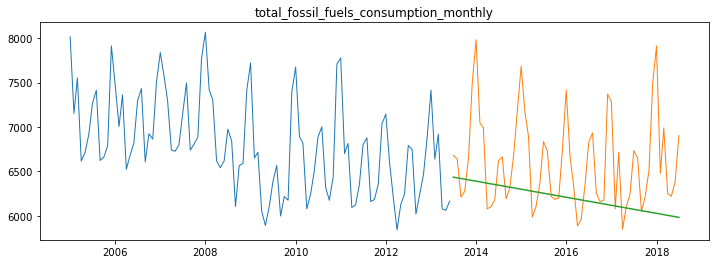

fossil_fuels_difference -- RMSE: 567


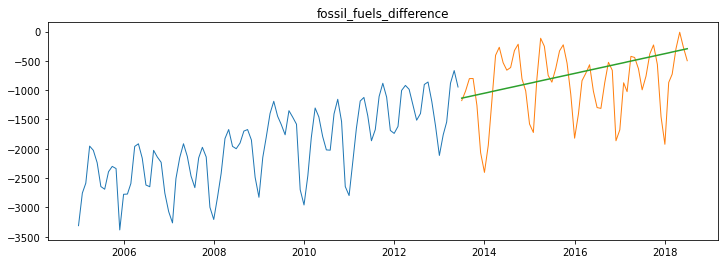

In [110]:
for col in train.columns:
    model = Holt(train[col], exponential=False)
    model = model.fit(smoothing_level=0.15, smoothing_slope=0.12, optimized=False)
    yhat_items = model.predict(start = validate.index[0], end= validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

for col in train.columns:
    plot_and_eval(target_var = col)

In [111]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_.15/.12', 
                            target_var = col)
eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
24,holts_.15/.12,total_fossil_fuels_production_monthly,364.0
21,holts_optimized,total_fossil_fuels_production_monthly,385.0
19,60_mmonth_moving_avg,total_fossil_fuels_consumption_monthly,508.0
13,12_mmonth_moving_avg,total_fossil_fuels_consumption_monthly,511.0
6,4_month_moving_average,total_fossil_fuels_production_monthly,516.0
9,4_mmonth_moving_avg,total_fossil_fuels_production_monthly,516.0
16,24_mmonth_moving_avg,total_fossil_fuels_consumption_monthly,517.0
23,holts_optimized,fossil_fuels_difference,539.0
2,last_observed_value,fossil_fuels_difference,544.0
5,simple_average,fossil_fuels_difference,544.0


In [112]:
yhat_df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2013-07-01,5297.69,6434.17,-1136.48
2013-08-01,5304.19,6426.62,-1122.43
2013-09-01,5310.70,6419.08,-1108.38
2013-10-01,5317.21,6411.53,-1094.32
2013-11-01,5323.72,6403.99,-1080.27


In [113]:
validate.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2013-07-01,5501.372,6679.546,-1178.174
2013-08-01,5622.438,6638.514,-1016.076
2013-09-01,5406.165,6209.405,-803.240
2013-10-01,5473.866,6275.289,-801.423
2013-11-01,5396.652,6656.275,-1259.623


total_fossil_fuels_production_monthly -- RMSE: 364


/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


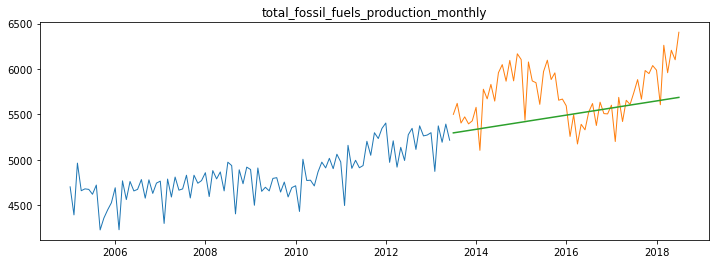

total_fossil_fuels_consumption_monthly -- RMSE: 645


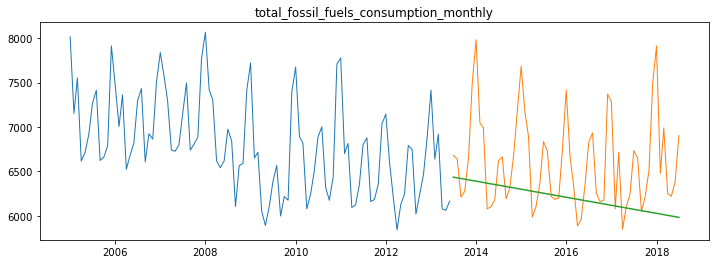

fossil_fuels_difference -- RMSE: 567


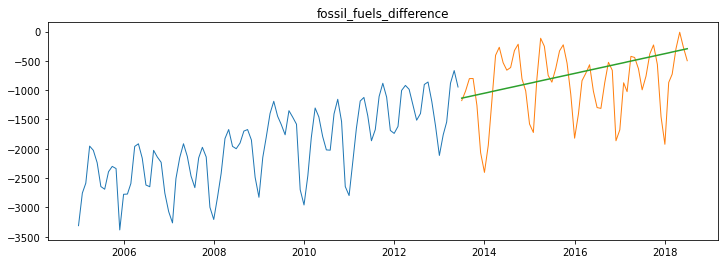

In [114]:
# create a function to house holts_.15/.12
def holts_15_12_model(train, validate):
    for col in train.columns:
        model = Holt(train[col], exponential=False)
        model = model.fit(smoothing_level=0.15, smoothing_slope=0.12, optimized=False)
        yhat_items = model.predict(start = validate.index[0], end= validate.index[-1])
        yhat_df[col] = round(yhat_items, 2)

    for col in train.columns:
        plot_and_eval(target_var = col, )
    return

holts_15_12_model(train, validate)



**Re-split data**

In [115]:
def previous_year(df):
    #split
    train = df['2004':'2010']
    validate = df['2011':'2016']
    test = df['2016':'2021']
    # make yhat_df
    yhat_df = train['2005':'2010'] + train.diff(60).mean()
    # concat dataframes
    pd.concat([yhat_df.head(1), validate.head(1)])
    # set yhat_df to index of validate
    yhat_df.index = validate.index
    # plot
    for col in train.columns:
        plot_and_eval(target_var = col)
    return

total_fossil_fuels_production_monthly -- RMSE: 364


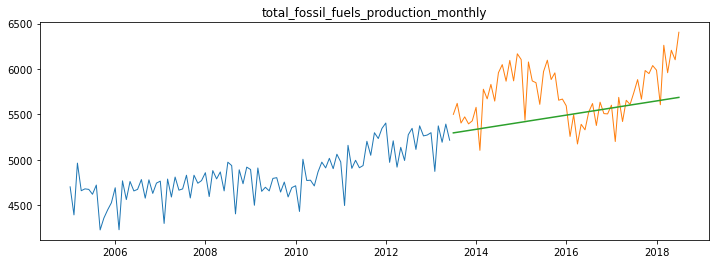

total_fossil_fuels_consumption_monthly -- RMSE: 645


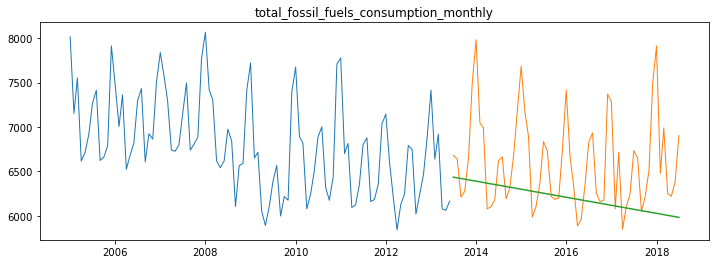

fossil_fuels_difference -- RMSE: 567


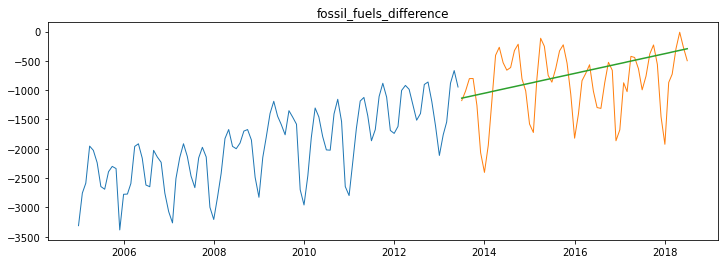

In [116]:
previous_year(df)

In [117]:
train = df_fossil_fuels['2004':'2010']
validate = df_fossil_fuels['2011':'2016']
test = df_fossil_fuels['2016':'2021']

print(train.shape)
print(validate.shape)
print(test.shape)

train.head()
train.tail()

(84, 3)
(72, 3)
(72, 3)


,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2010-08-01,4975.638,6999.945,-2024.307
2010-09-01,4912.295,6317.627,-1405.332
2010-10-01,5017.727,6173.845,-1156.118
2010-11-01,4903.486,6439.027,-1535.541
2010-12-01,5062.813,7707.990,-2645.177


In [118]:
# finding the year-over-year difference for each day from 2013 to 2015
# taking the mean, and then adding that value to the daily 2015 values. 

# find yoy diff. from 2013-2014 and 2014-2015, take the mean, and add to each value in 2015. 
# yhat_df = train['2005':'2010'] + train.diff(60).mean()

In [119]:
# train.diff(60).mean()

In [120]:
# train.loc['2005':'2010'].head()

In [121]:
# yhat_df.head()

In [122]:
# let's peek into the prediction we will make for 1/1/2020
# by comparing the predicted value 
# (2015 value + year-over-year average difference)
# to the actual 1/1/2020 value
# pd.concat([yhat_df.head(1), validate.head(1)])

In [123]:
# set yhat_df to index of validate
# yhat_df.index = validate.index

In [124]:
yhat_df.describe()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
count,61.000000,61.000000,61.000000
mean,5492.904426,6207.805410,-714.901475
std,115.522886,133.954027,249.476659
min,5297.690000,5981.440000,-1136.480000
25%,5395.300000,6094.620000,-925.690000
50%,5492.900000,6207.810000,-714.900000
75%,5590.510000,6320.990000,-504.110000
max,5688.120000,6434.170000,-293.320000


In [125]:
# yhat_df.head()

In [126]:
# yhat_df.shape

In [127]:
# for col in train.columns:
#     plot_and_eval(target_var = col)
#     eval_df = append_eval_df(model_type = "previous_year", 
#                             target_var = col)

## Conclusion

Which model did the best? 

In [133]:
def final_plot(target_var, train, validate, test, yhat_df):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], label='train')
    plt.plot(validate[target_var], label='validate')
    plt.plot(test[target_var], label='test')
    plt.plot(yhat_df[target_var], alpha=.5)
    plt.title(target_var)
    plt.show()

In [134]:
def conclusion_model(train, test):
    #train + validate to predict test
    yhat_df = validate + train.diff().mean()
    yhat_df.index = test.index
    for col in train.columns:
        final_plot(col,train, validate, test, yhat_df)
    # to predict the next six years
    yhat_df = test + train.diff(60).mean()
    yhat_df.index = test.index + pd.Timedelta('6Y')
    for col in train.columns:
        final_plot(col,train, validate, test, yhat_df)
    return 

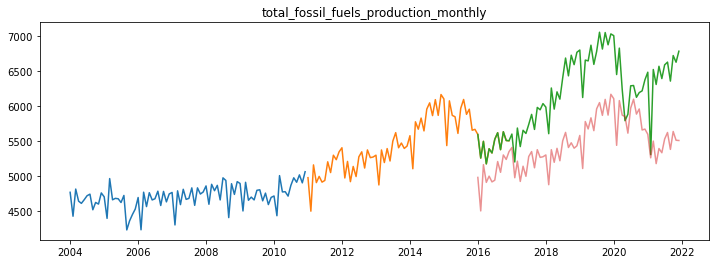

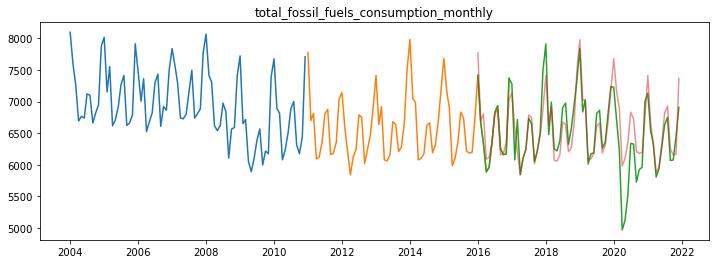

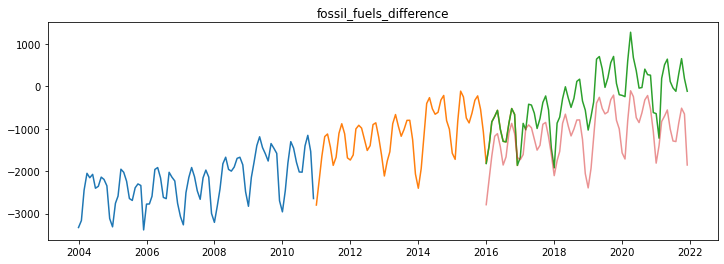

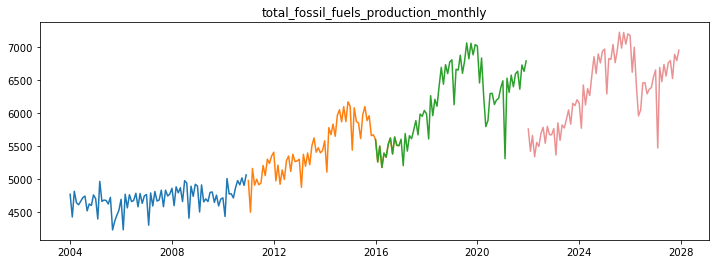

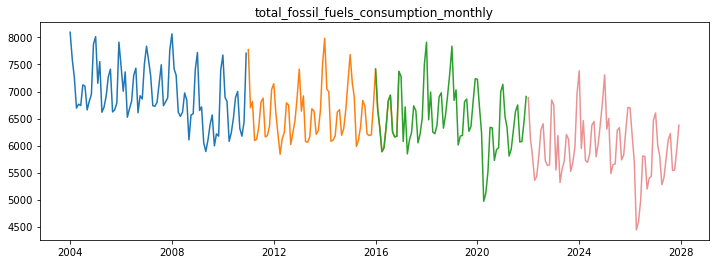

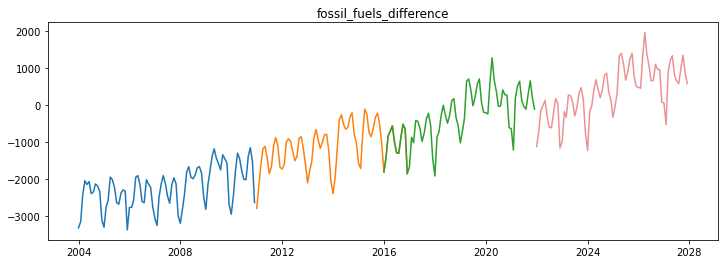

In [135]:
conclusion_model(train, test)

In [136]:
production_min_rmse = eval_df.groupby('target_var')['rmse'].min()[0]

consumption_min_rmse = eval_df.groupby('target_var')['rmse'].min()[1]

difference_min_rmse = eval_df.groupby('target_var')['rmse'].min()[2]

# find which model that is
eval_df[((eval_df.rmse == production_min_rmse) | 
         (eval_df.rmse == consumption_min_rmse) |
         (eval_df.rmse == difference_min_rmse))]

,model_type,target_var,rmse
19,60_mmonth_moving_avg,total_fossil_fuels_consumption_monthly,508.0
23,holts_optimized,fossil_fuels_difference,539.0
24,holts_.15/.12,total_fossil_fuels_production_monthly,364.0


Let's test it out on our out-of-sample data

We will be using train + validate to predict test. 

In [137]:
yhat_df = validate + train.diff().mean()
yhat_df.index = test.index

In [138]:
yhat_df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2016-01-01,4981.328711,7771.646289,-2790.317578
2016-02-01,4501.697711,6695.110289,-2193.412578
2016-03-01,5164.311711,6808.204289,-1643.892578
2016-04-01,4910.491711,6087.824289,-1177.332578
2016-05-01,4999.571711,6115.962289,-1116.390578
...,...,...,...
2021-08-01,5624.710711,6927.646289,-1302.935578
2021-09-01,5382.692711,6246.835289,-864.142578
2021-10-01,5639.124711,6156.017289,-516.892578


In [139]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], label='train')
    plt.plot(validate[target_var], label='validate')
    plt.plot(test[target_var], label='test')
    plt.plot(yhat_df[target_var], alpha=.5)
    plt.title(target_var)
    plt.show()

In [140]:
rmse_production = sqrt(mean_squared_error(test['total_fossil_fuels_production_monthly'], 
                                       yhat_df['total_fossil_fuels_production_monthly']))

rmse_consumption = sqrt(mean_squared_error(test['total_fossil_fuels_consumption_monthly'], 
                                       yhat_df['total_fossil_fuels_consumption_monthly']))


rmse_difference = sqrt(mean_squared_error(test['fossil_fuels_difference'], 
                                       yhat_df['fossil_fuels_difference']))

In [141]:
print('rmse-production: ', rmse_production)
print('rmse-consumption: ', rmse_consumption)
print('rmse-difference: ', rmse_difference)

rmse-production:  792.9694849246101
rmse-consumption:  318.3896269342269
rmse-difference:  872.5391215379145


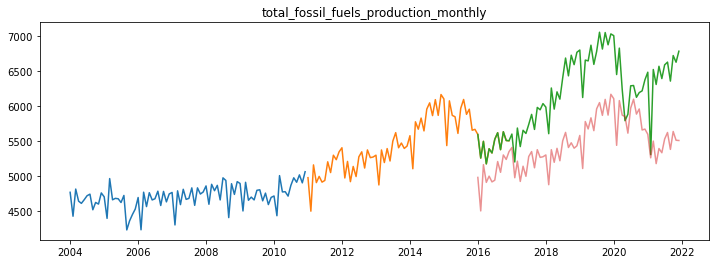

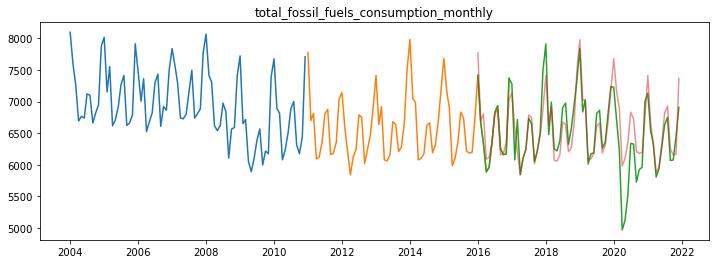

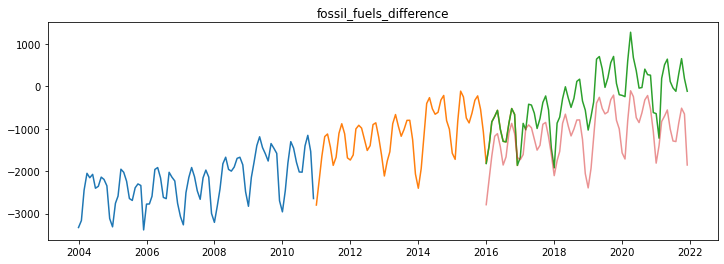

In [142]:
for col in train.columns:
    final_plot(col)

In [143]:
# to predict 2022

yhat_df = test + train.diff(60).mean()

yhat_df.index = test.index + pd.Timedelta('6Y')

In [144]:
yhat_df.head()

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly,fossil_fuels_difference
date,,,
2021-12-31 10:55:12,5757.992625,6885.9455,-1127.952875
2022-01-31 10:55:12,5420.481625,6134.4325,-713.950875
2022-03-01 10:55:12,5660.275625,5807.5915,-147.315875
2022-04-01 10:55:12,5337.558625,5356.7365,-19.177875
2022-05-01 10:55:12,5553.956625,5429.5185,124.438125


In [145]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], label='train')
    plt.plot(validate[target_var], label='validate')
    plt.plot(test[target_var], label='test')
    plt.plot(yhat_df[target_var], alpha=.5)
    plt.title(target_var)
    plt.show()

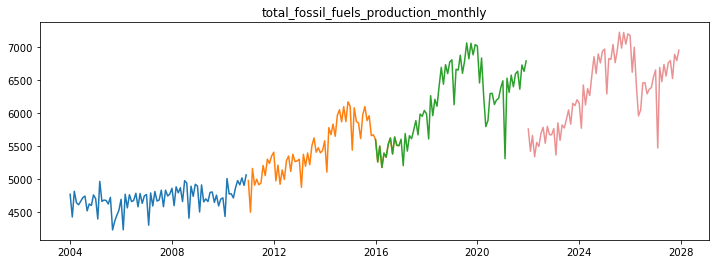

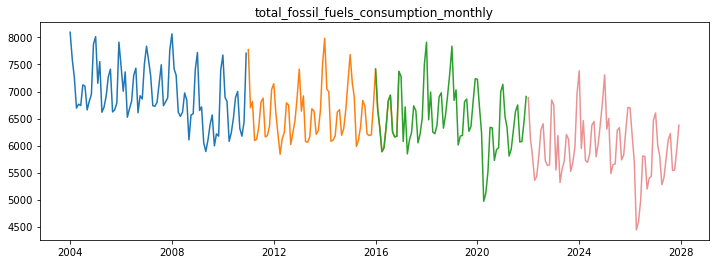

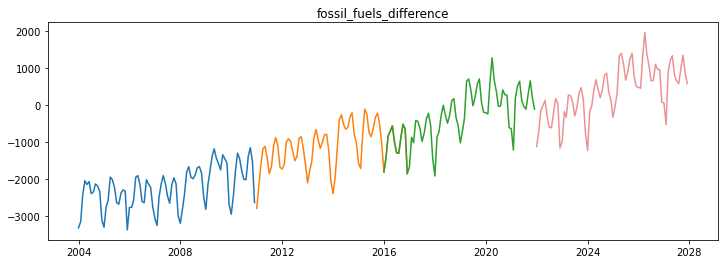

In [146]:
for col in train.columns:
    final_plot(col)